In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

path = "../../data/org/scatcs/"
ffp = []
for root, dirs, files in os.walk(path):
    for file in files:
        if file.endswith(".csv"):
            ffp.append(os.path.join(root, file)) 

for i in ffp:
    print(i)

../../data/org/scatcs/1110012100.csv
../../data/org/scatcs/1110012115.csv
../../data/org/scatcs/1110012130.csv
../../data/org/scatcs/1110012145.csv
../../data/org/scatcs/1110012160.csv
../../data/org/scatcs/1110012175.csv
../../data/org/scatcs/1110012190.csv
../../data/org/scatcs/1110012300.csv
../../data/org/scatcs/1110012315.csv
../../data/org/scatcs/1110012330.csv
../../data/org/scatcs/1110012345.csv
../../data/org/scatcs/1110012360.csv
../../data/org/scatcs/1110012375.csv
../../data/org/scatcs/1110012390.csv


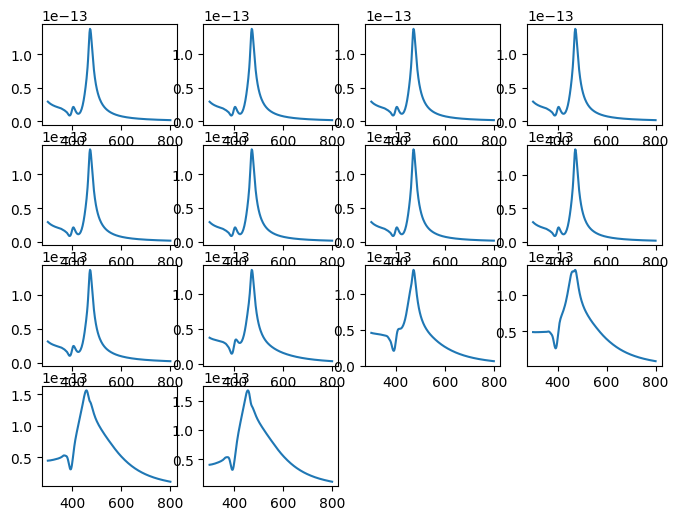

In [2]:
plt.figure(figsize=(8, 6))
for i, val in enumerate(ffp):
    df = pd.read_csv(val, header=0, sep=',')
    plt.subplot(4, 4, i+1)
    plt.plot(df['lambda'], df['csa'])
plt.show()

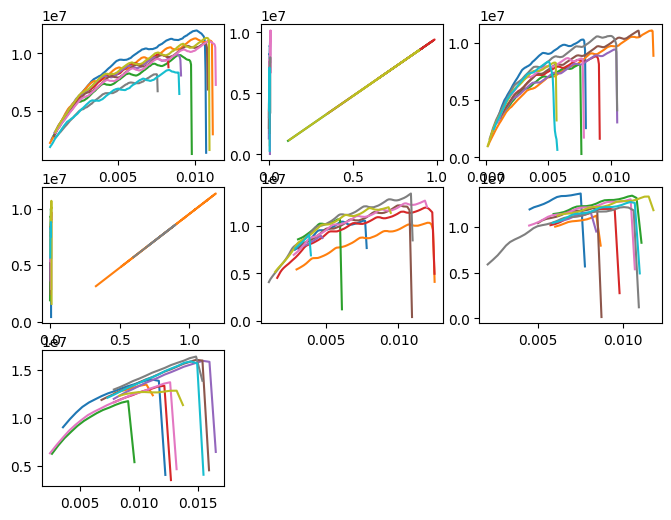

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

path = "../../data/org/elasticity/"

plt.figure(figsize=(8, 6))
pre = ['v05', 'v08', 'v10', 'v15',
       'v20', 'v40', 'v80']

for i, v in enumerate(pre):
    plt.subplot(3, 3, i+1)
    for j in range(1, 10+1):
        s = f's{j:02d}'
        f = path + v + s + '.xlsx'
        df = pd.read_excel(f, header=0)
        plt.plot(df['Strain'], df['Stress'])
plt.show()

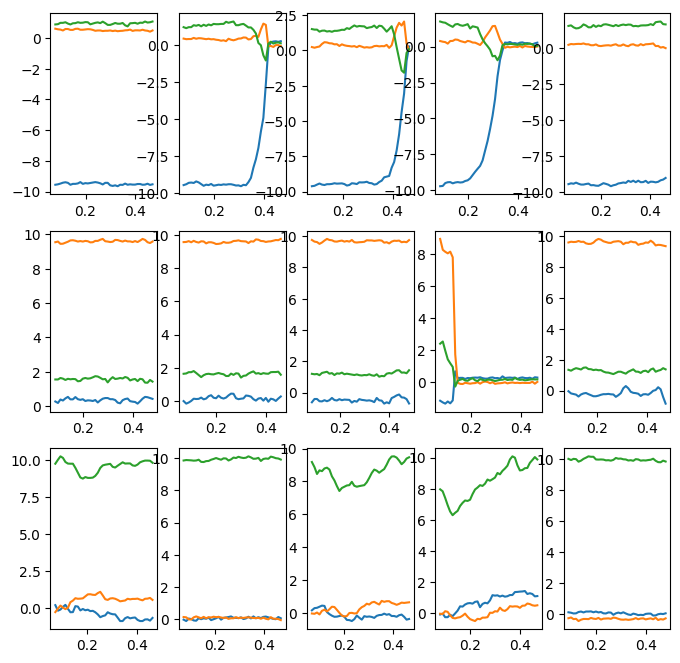

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import zipfile

path = "../../data/org/freefall/"
ffp = []
for root, dirs, files in os.walk(path):
    for file in files:
        if file.endswith(".zip"):
            ffp.append(os.path.join(root, file)) 

plt.figure(figsize=(8, 8))
for i, val in enumerate(ffp):
    zf = zipfile.ZipFile(val) 
    df = pd.read_csv(
        zf.open('TotalAcceleration.csv'),
        header=0, sep=',')[:40]
    plt.subplot(3, 5, i+1)
    plt.plot(df['seconds_elapsed'], df['x'])
    plt.plot(df['seconds_elapsed'], df['y'])
    plt.plot(df['seconds_elapsed'], df['z'])
plt.show()

44100
[0 0 0 ... 0 0 0]
Nsample = 405891


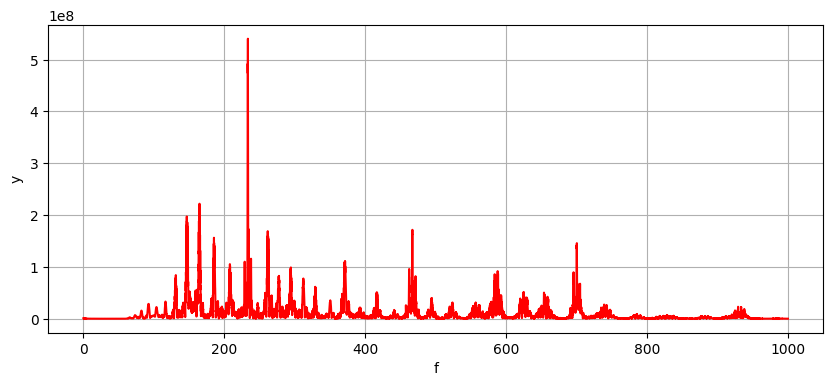

In [61]:
from scipy.io import wavfile
from IPython.display import Audio, display
import os
from scipy.fft import rfft, rfftfreq
import matplotlib.pyplot as plt
import numpy as np

# define filename
fname = '../../data/org/sounds/cello.wav'

# get file existence
file_exist = os.path.exists(fname)

# read file
if file_exist:
    sample_rate, data = wavfile.read(fname)
    print(sample_rate)
    print(data)

Nsample = len(data)
print("Nsample =", Nsample)

yf = rfft(data)
xf = rfftfreq(Nsample, 1/ sample_rate)

# plot signal in freqency domain
plt.figure(figsize=(10, 4))
plt.grid()
plt.xlabel('f')
plt.ylabel('y')
plt.plot(xf[:9200], np.abs(yf[:9200]), 'r-')
plt.show()


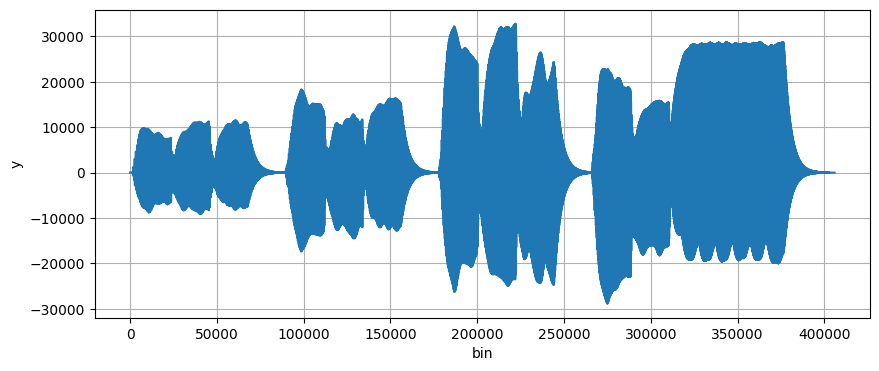

In [62]:

# plot signal in freqency domain
plt.figure(figsize=(10, 4))
plt.grid()
plt.xlabel('bin')
plt.ylabel('y')
plt.plot(data)
plt.show()